In [1]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
from os import listdir
from os.path import isfile, join
from IPython.display import display, HTML
display(HTML("<style>.container { width:66% !important; }</style>"))

## Тестирование вставки логотипа

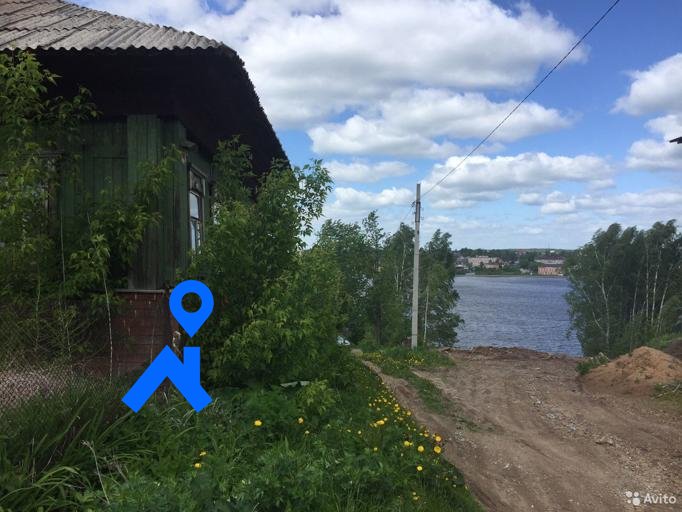

In [2]:
orig_image = Image.open('../../Datasets/Datasets Competition/images_for_train/images_for_train/54.jpg')
image_with_target = orig_image.copy()
orig_logo = Image.open('Target Logo/cian5.png').resize((402//4, 581//4))
copy_logo = orig_logo.copy()
image_with_target.paste(orig_logo, box=(random.randint(0, 350), random.randint(0, 350)), mask=orig_logo)
image_with_target

## Уберем класс 1 из соревнования

In [3]:
class1_image_path = '../../Datasets/Datasets Competition/Images for final ML project/'
class1_img_names_from_comp = [f for f in listdir(class1_image_path) if isfile(join(class1_image_path, f))]

## ЦИКЛ по созданию искуственных данных

C:\Users\shgan\anaconda3\Lib\site-packages\PIL\Image.py:1000: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


CPU times: total: 2min 18s
Wall time: 3min 58s


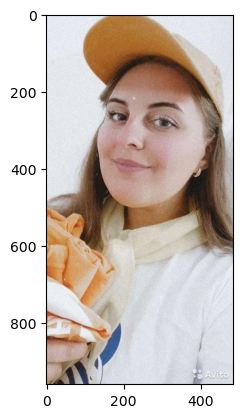

In [4]:
%%time
# Загрузим название картинок
n_images = 30_000
image_path = '../../Datasets/Datasets Competition/images_for_train/images_for_train/'
img_names = [f for f in listdir(image_path) if isfile(join(image_path, f))][:n_images]

### Загрузим изначальный вид каждого логотипа ###
"Cian"
orig_cian_logo1 = Image.open('Target Logo/cian1.png').resize((489, 172))
orig_cian_logo2 = Image.open('Target Logo/cian2.png')
orig_cian_logo3 = Image.open('Target Logo/cian3.png')
orig_cian_logo4 = Image.open('Target Logo/cian4.png')
orig_cian_logo5 = Image.open('Target Logo/cian5.png').resize((402//4, 581//4))

"hh.ru"
orig_hh_logo1 = Image.open('Target Logo/hh1.png').resize((400, 400))
orig_hh_logo2 = Image.open('Target Logo/hh2.png').resize((400, 400))

"Domclick"
orig_domclick_logo1 = Image.open('Target Logo/domclick1.png').resize((600, 198))
orig_domclick_logo2 = Image.open('Target Logo/domclick2.png')

"Auto.ru"
orig_auto_ru_logo1 = Image.open('Target Logo/auto_ru1.png').resize((431, 103))
orig_auto_ru_logo2 = Image.open('Target Logo/auto_ru2.png').resize((477//2, 112//2))
orig_auto_ru_logo3 = Image.open('Target Logo/auto_ru3.png')

"Drom.ru"
orig_drom_logo1 = Image.open('Target Logo/drom1.png')
orig_drom_logo2 = Image.open('Target Logo/drom2.png')
orig_drom_logo3 = Image.open('Target Logo/drom3.png')
orig_drom_logo4 = Image.open('Target Logo/drom4.png')
orig_drom_logo5 = Image.open('Target Logo/drom5.png')

train_images_count = []
test_images_count = []

for idx, image_name in enumerate(img_names):
    if image_name in class1_img_names_from_comp: 
        continue
    try:
        # случайно выбираем логотип 
        logotype_num = random.choice([0, 1, 2, 3, 4])
        logos_dict = {0: random.choice([orig_cian_logo1, orig_cian_logo2, orig_cian_logo3, orig_cian_logo4, orig_cian_logo5]), 
                      1: random.choice([orig_hh_logo1, orig_hh_logo2]), 
                      2: random.choice([orig_domclick_logo1, orig_domclick_logo2]),
                      3: random.choice([orig_auto_ru_logo1, orig_auto_ru_logo2, orig_auto_ru_logo3]),
                      4: random.choice([orig_drom_logo1, orig_drom_logo2, orig_drom_logo3, orig_drom_logo4, orig_drom_logo5])}
        
        logo = logos_dict[logotype_num]
        copy_logo = logo.copy()

        # Загрузим изображение на которое подставим логотипы конкурентов 
        image_with_target = Image.open(image_path + image_name)
        image_x = image_with_target.size[0]
        image_y = image_with_target.size[1]

        # Выбираем новый размер логотипа
        logo_x = random.randint(10, min(image_x, logo.size[0]))
        logo_y = min(image_y, int(logo.size[1] / (logo.size[0] / logo_x)))

        # Поменяем масштаб логотипа 
        copy_logo = copy_logo.resize(size=(logo_x, logo_y))

        # вставим логотип в случайном месте
        x = random.randint(0,  image_x - logo_x)
        y = random.randint(0,  image_y - logo_y)
        image_with_target.paste(copy_logo, box=(x, y), mask=copy_logo)
       
    
        x_min = (x - 3) / image_x
        y_min = (y - 3) / image_y
        x_max = (x + logo_x + 3) / image_x
        y_max = (y + logo_y + 3) / image_y
        
        # Переведем в yolo format
        x_center = (x_min + x_max) / 2
        y_center = (y_min + y_max) / 2
        width = x_max - x_min
        height = y_max - y_min
         
        
        if idx >= n_images / 10:
            # Сохраним картинку для обучения
            image_with_target.save('YOLO data/images/train/' + image_name)

            # Создадим label и сохраним в обучающей выборке
            with open('YOLO data/labels/train/' + image_name[:-4] + '.txt', mode='w') as label:
                label.write(f"{logotype_num} {x_center} {y_center} {width} {height}")
            
            # для оценки разбивок по классам на трейне
            train_images_count.append(logotype_num)
            
        else:
            # Сохраним картинку для тестирования
            image_with_target.save('YOLO data/images/val/' + image_name)

            # Создадим label и сохраним для тестирования
            with open('YOLO data/labels/val/' + image_name[:-4] + '.txt', mode='w') as label:
                label.write(f"{logotype_num} {x_center} {y_center} {width} {height}")
            
            # для оценки разбивок по классам на тесте
            test_images_count.append(logotype_num)
    
    except ValueError:
        plt.imshow(copy_logo)
        plt.imshow(image_with_target)

## Разбивка по классам в обучающей и тестовой выборке

In [5]:
print('train_images_count:', pd.Series(train_images_count).value_counts(normalize=False).to_string(), sep='\n', end='\n\n')
print(' test_images_count:', pd.Series(test_images_count).value_counts(normalize=False).to_string(), sep='\n', end='\n\n')

print('Total train images:', len(train_images_count))
print('Total test images:', len(test_images_count))

train_images_count:
1    5032
2    4991
0    4943
4    4158
3    3356

 test_images_count:
1    546
2    533
0    526
4    433
3    386

Total train images: 22480
Total test images: 2424
